In [3]:
%pip list

Package                       Version                            Editable project location
----------------------------- ---------------------------------- ----------------------------------------------------
alabaster                     1.0.0
appnope                       0.1.4
asttokens                     3.0.0
babel                         2.17.0
Bottleneck                    1.4.2
Brotli                        1.0.9
certifi                       2025.1.31
charset-normalizer            3.4.1
comm                          0.2.2
contourpy                     1.3.1
cycler                        0.11.0
debugpy                       1.8.13
decorator                     5.2.1
docutils                      0.21.2
executing                     2.2.0
fonttools                     4.55.3
funROI                        1.0.0.post1                        /Users/songwen/Documents/Code Lab/funROI
h5py                          3.13.0
idna                          3.10
imagesize                   

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from nilearn.image import new_img_like
from nilearn.plotting import plot_surf_roi, plot_roi
from nilearn.datasets import fetch_surf_fsaverage
from nilearn.surface import vol_to_surf

subjects1 = ['100206', '100307', '100408', '100610']
subjects2 = ['152427', '152831', '153025', '153126']

# from funROI.datasets import hcp
# hcp.fetch_data("./data", task='LANGUAGE', subjects=subjects1+subjects2)

In [5]:
fsaverage = fetch_surf_fsaverage('fsaverage5')

def plot_surf(data, views=["lateral", "medial"], hemispheres=["left", "right"],
              inflate=False):
   print(fsaverage)
   surf_data = {
       "left": vol_to_surf(data, fsaverage.pial_left,
                           interpolation='nearest', radius=0),
       "right": vol_to_surf(data, fsaverage.pial_right,
                            interpolation='nearest', radius=0),
   }
   for hemi in hemispheres:
       for view in views:
            surf_mesh = f"infl_{hemi}" if inflate else f"pial_{hemi}"
            plot_surf_roi(
                surf_mesh=getattr(fsaverage, surf_mesh),
                roi_map=surf_data[hemi],
                hemi=hemi,
                view=view,
                bg_on_data=True,
                bg_map=getattr(fsaverage, f"sulc_{hemi}"),
                darkness=0.5,
                cmap="gist_ncar",
                avg_method='max',
            )
            

In [6]:
import funROI
funROI.set_bids_data_folder('./data/bids')
funROI.set_bids_preprocessed_folder('./data/bids')
funROI.set_bids_deriv_folder('./data/bids/derivatives')
funROI.set_analysis_output_folder("./data/analysis")

from funROI.first_level.nilearn import run_first_level
run_first_level(
    task = 'LANGUAGE',
    subjects = subjects1 + subjects2,
    space = 'MNINonLinear',
    contrasts = [
        ('story', {'story': 1}),
        ('math', {'math': 1}),
        ('story-math', {'story': 1, 'math': -1}),
    ],
    hrf_model='spm + derivative',
    smoothing_fwhm=4,
    noise_model="ar1",
    slice_time_ref = 0
)

/Users/songwen/Documents/Code Lab/funROI/funROI/first_level/nilearn.py:94: UserWarning: 'StartTime' not found in file /Users/songwen/Documents/Code Lab/funROI/data/bids/sub-100206/func/sub-100206_task-LANGUAGE_run-1_acq-LR_space-MNINonLinear_bold.json.
  first_level_from_bids(


In [7]:
from funROI.analysis import ParcelsGenerator
parcels_generator = ParcelsGenerator(
    parcels_name="Language",
    smoothing_kernel_size=10,
    overlap_thr_vox=0.20
)
parcels_generator.add_subjects(
    subjects=subjects1,
    task="LANGUAGE",
    contrasts=["story-math"],
    p_threshold_type="none",
    p_threshold_value=0.05,
)
parcels = parcels_generator.run()

/Users/songwen/Documents/Code Lab/funROI/funROI/analysis/parcels_gen.py:470: RuntimeWarning: divide by zero encountered in divide
  return len(data) / np.sum(1 / data)


/var/folders/6k/pb317l7j3cvbw86w9005j5340000gp/T/ipykernel_44447/754369178.py:7: FutureWarning: The 'nearest' interpolation method will be deprecated in 0.13.0. To disable this warning, select either 'linear' or 'nearest_most_frequent'. If your image is a deterministic atlas 'nearest_most_frequent' is recommended. Otherwise, use 'linear'. See the documentation for more information.
  "left": vol_to_surf(data, fsaverage.pial_left,
/var/folders/6k/pb317l7j3cvbw86w9005j5340000gp/T/ipykernel_44447/754369178.py:9: FutureWarning: The 'nearest' interpolation method will be deprecated in 0.13.0. To disable this warning, select either 'linear' or 'nearest_most_frequent'. If your image is a deterministic atlas 'nearest_most_frequent' is recommended. Otherwise, use 'linear'. See the documentation for more information.
  "right": vol_to_surf(data, fsaverage.pial_right,


{'area_left': '/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/datasets/data/fsaverage5/area_left.gii.gz', 'area_right': '/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/datasets/data/fsaverage5/area_right.gii.gz', 'curv_left': '/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/datasets/data/fsaverage5/curv_left.gii.gz', 'curv_right': '/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/datasets/data/fsaverage5/curv_right.gii.gz', 'flat_left': '/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/datasets/data/fsaverage5/flat_left.gii.gz', 'flat_right': '/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/datasets/data/fsaverage5/flat_right.gii.gz', 'infl_left': '/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/datasets/data/fsaverage5/infl_left.gii.gz', 'infl_right': '/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/datasets/data/fsaverage5/infl_right.gii.gz', 'pial_left': '/Users/songwen/Documents/

/Users/songwen/Documents/Code Lab/funROI/nilearn_mod/nilearn/plotting/surface/_matplotlib_backend.py:225: UserWarning: You provided a non integer threshold but configured the colorbar to use integer formatting.
  warn(


matplotlib
matplotlib
matplotlib


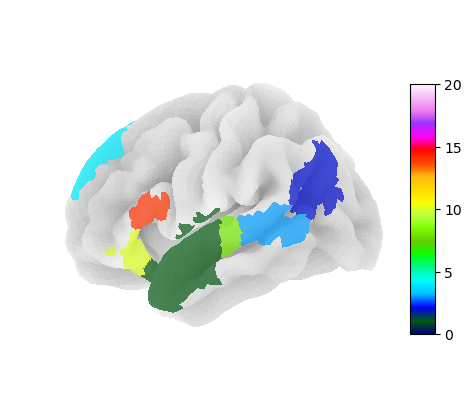

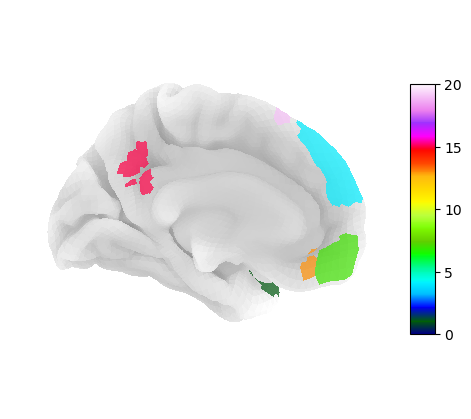

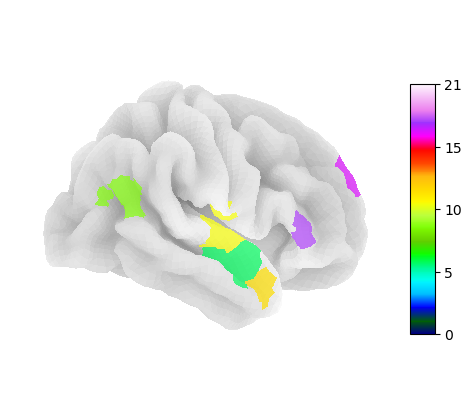

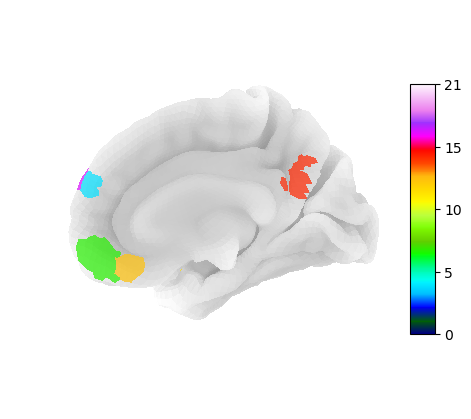

In [8]:
plot_surf(parcels, views=["lateral", "medial"], hemispheres=["left", "right"])
